## QUESTION 2:
Take a linear regression dataset from the website and experiment(You can
use all forms of regression, including LASSO and Ridge, and you can use
library function) https://www.kaggle.com/rtatman/datasets-for-regression-
analysis

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train=pd.read_csv('/home/ashly/Desktop/Machine Learning/Lab Assignment/Lab Assignment 9-10-20/Question2/Dataset Weather in Szegad/weatherHistory.csv')

#PREPROCESSING START
s=train.select_dtypes(include='object')
remove_list=list(s)

#Here we use the drop function to remove the object column types. The inplace [if set to True, will 
# change the train data inplace, if set to False will change the data after assigning it ]
train.drop(remove_list,axis=1,inplace=True)
#PREPROCESSING DONE


#Predicting the Temperature using all the features
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

from sklearn.model_selection import train_test_split
X=train.drop('Temperature (C)',1)
x_train,x_cv,y_train,y_cv=train_test_split(X,train['Temperature (C)'],test_size=0.3)

x_train.shape

lreg.fit(x_train,y_train)
pred=lreg.predict(x_cv)
mse=np.mean(np.square(pred-y_cv))
print('MSE:',mse)
#R-Squared value
print('R-Squared:',lreg.score(x_cv,y_cv))





MSE: 0.8976921629340127
R-Squared: 0.9901830805711033


In [21]:
train['Temperature (C)']

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

<AxesSubplot:title={'center':'Modal Coefficients'}>

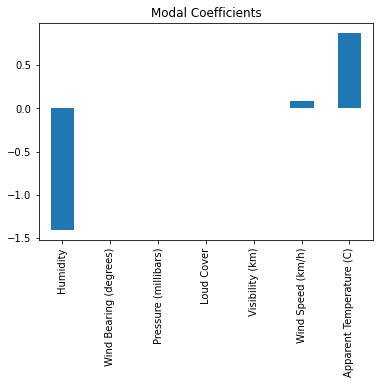

In [22]:
predictors = x_train.columns
coef=pd.Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')



In [24]:
#Predicting the Temperature using all features and Implementing Ridge Regularisation
from sklearn.linear_model import Ridge
rid_reg=Ridge(alpha=0.05,normalize=True)

from sklearn.model_selection import train_test_split
X=train.drop('Temperature (C)',1)
x_train,x_cv,y_train,y_cv=train_test_split(X,train['Temperature (C)'],test_size=0.3)

x_train.shape

rid_reg.fit(x_train,y_train)
pred=rid_reg.predict(x_cv)
mse=np.mean(np.square(pred-y_cv))
print('MSE:',mse)
#R-Squared value
print('R-Squared:',lreg.score(x_cv,y_cv))

MSE: 1.2414680420661175
R-Squared: 0.989997841168601


<AxesSubplot:>

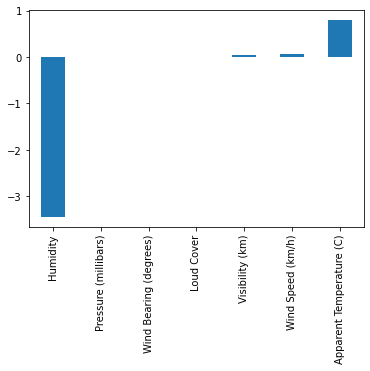

In [25]:
#Printing the coefficent Graph
predictorsR=x_train.columns
coeffR=pd.Series(rid_reg.coef_,predictorsR).sort_values()
coeffR.plot(kind='bar')

In [26]:
#Predicting the Temperature using all features and Implementing LASSO Regularisation
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.05,normalize=False)

from sklearn.model_selection import train_test_split
X=train.drop('Temperature (C)',1)
x_train,x_cv,y_train,y_cv=train_test_split(X,train['Temperature (C)'],test_size=0.3)

x_train.shape

lasso_reg.fit(x_train,y_train)
pred=lasso_reg.predict(x_cv)
mse=np.mean(np.square(pred-y_cv))
print('MSE:',mse)
#R-Squared value
print('R-Squared:',lreg.score(x_cv,y_cv))

MSE: 0.9365188438508804
R-Squared: 0.9901919939356453


<AxesSubplot:>

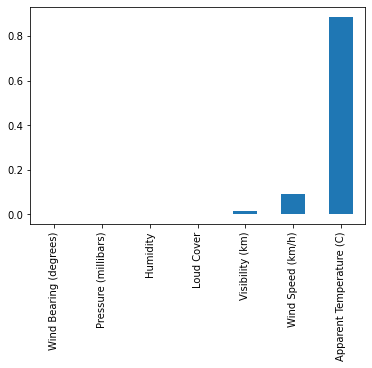

In [27]:
# Find the coefficent graph
predictorsL=x_train.columns
coeffL=pd.Series(lasso_reg.coef_,predictorsL).sort_values()
coeffL.plot(kind='bar')




RESULT ANALYSIS Question2:

We can see that Lasso and Ridge regularization has been used to predict the target variable 'Temperature' 
from the dataset.